In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import integrate
from mpmath import mp
mp.dps = 50

# import warnings
# warnings.filterwarnings('ignore')

t0 = 0.0
x0 = 300.0
v = 2.0

In [2]:
ls = 2**13
data = np.fromfile('bypartsII/X.bin')
lt = np.shape(data)[0]//(3*ls)
data = data.reshape(np.shape(data)[0]//3, 3)
space = np.zeros((ls))
time = np.zeros((lt))
phi1 = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    space[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        phi1[i,j] = data[ls*i+j,2]

In [3]:
# print(time)

In [4]:
# print(space) 

In [5]:
# print(phi1)

In [6]:
# for i in range(lt):
#     pl.plot(space[:], phi1[i,:])
# pl.xlim(100, 1600)

In [7]:
# amp1 = np.array([ np.max(np.abs( phi1[i, :] )) for i in range(lt) ])
    
# pl.plot(time[:lt], amp1)
# pl.xlabel('time')
# pl.ylabel('amplitude')
# # pl.title(r'$v = 0.7$')
# pl.show()

\begin{equation}
	\large x_c = x_0 + v (t - t_0), \qquad u = \frac{\sqrt{v}}{2} (x - x_c), \qquad \varphi ^{(0)} = \frac{v}{2} \text{sech} ^2 u
\end{equation}

In [8]:
def sech(x):
    return 1/np.cosh(x)

def xc(t):
    return x0 + v*(t - t0)

def u(t, x):
    return (np.sqrt(v)/2) * (x - xc(t))

def soliton(t, x):
    return (v/2) * sech(u(t, x))**2

\begin{equation}
    \large \lambda = (\lambda ^1 , \lambda ^2) = (x_c , v) ; \qquad \beta ^{(0)} = ( v , 0 )
\end{equation}

\begin{equation}
    \large \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} = \frac{\partial \varphi ^{(0)}}{\partial x_c} = \frac{v^{3/2}}{2} \text{sech}^2 u \tanh u , \qquad \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2} = \frac{\partial \varphi ^{(0)}}{\partial v} = \frac{1}{2} \text{sech}^2 u [1 - u \tanh u]
\end{equation}

In [9]:
def phi0_1(t, x):
    return (v**(3/2)/2) * sech(u(t, x))**2 * np.tanh(u(t, x))

def phi0_2(t, x):
    return (1/2) * sech(u(t, x))**2 * (1 - u(t, x) * np.tanh(u(t, x)))

In [10]:
# for i in range(lt):
#     pl.plot(space, phi0_1(time[i], space))
# pl.xlim(250.0, 1000.0)

In [11]:
# for i in range(lt):
#     pl.plot(space, phi0_2(time[i], space))
# pl.xlim(250.0, 550.0)

\begin{gather}
    \large e^{(0)}_1 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(0)}_2 = \frac{1}{2} (t - t_0)^2 \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}, \\
    \large e^{(1)}_1 = \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(1)}_2 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}
\end{gather}

In [12]:
def e0_1(ti): # ti: time index
    return (time[ti] - t0) * phi0_1(time[ti], space)
    
def e0_2(ti):
    return 0.5 * (time[ti] - t0)**2 * phi0_1(time[ti], space) + (time[ti] - t0) * phi0_2(time[ti], space)

def e1_1(ti):
    return phi0_1(time[ti], space)

def e1_2(ti):
    return (time[ti] - t0) * phi0_1(time[ti], space) + phi0_2(time[ti], space)

In [13]:
# for i in range(lt):
#     pl.plot(space, e0_1(i))
# pl.xlim(250.0, 550.0)

In [14]:
# for i in range(lt):
#     pl.plot(space, e0_2(i))
# pl.xlim(250.0, 550.0)

In [15]:
# for i in range(lt):
#     pl.plot(space, e1_1(i))
# pl.xlim(250.0, 550.0)

In [16]:
# for i in range(lt):
#     pl.plot(space, e1_2(i))
# pl.xlim(250.0, 550.0)

In [17]:
def space_integration(f): # T: time index, total time
    return integrate.simpson(f, space, even='avg')

In [18]:
space_integration(np.exp(-space))

1.0011356297499014

\begin{equation}
    \large M ^{(\mu )(\nu )}_{ij} = \int dt \, dx \, e^{(\mu )}_i e^{(\nu )}_j = \int dt \, m ^{(\mu )(\nu )}_{ij}, \qquad
    \large m ^{(\mu) (\nu)}_{ij} = \int dx \, e^{(\mu )}_i e^{(\nu )}_j = \begin{pmatrix}
    m ^{(0) (0)}_{22} & m ^{(0)(1)}_{21} & m ^{(0)(1)}_{22} \\
    m ^{(1) (0)}_{12} & m ^{(1)(1)}_{11} & m ^{(1)(1)}_{12} \\
    m ^{(1) (0)}_{22} & m ^{(1)(1)}_{21} & m ^{(1)(1)}_{22}
    \end{pmatrix}
\end{equation}

In [19]:
# ti: time index
# mu = nu = 0

def m00_22(ti):
    return space_integration(e0_2(ti)**2)

# mu = 0, nu = 1

def m01_21(ti):
    return space_integration(e0_2(ti) * e1_1(ti))

def m01_22(ti):
    return space_integration(e0_2(ti) * e1_2(ti))

# mu = 1, nu = 0

def m11_11(ti):
    return space_integration(e1_1(ti)**2)

def m11_12(ti):
    return space_integration(e1_1(ti) * e1_2(ti))

def m11_22(ti):
    return space_integration(e1_2(ti)**2)

In [20]:
T = lt - 1
# pl.plot(time[:T], [ m00_22(i) for i in range(T) ], label=r'$m^{(0)(0)}_{22}$')
# pl.legend()

In [21]:
# pl.plot(time[:T], [ m01_21(i) for i in range(T) ], label=r'$m^{(0)(1)}_{21}$')
# pl.plot(time[:T], [ m01_22(i) for i in range(T) ], label=r'$m^{(0)(1)}_{22}$')
# pl.legend()

In [22]:
# pl.plot(time[:T], [ m10_12(i) for i in range(T) ], label=r'$m^{(1)(0)}_{12}$')
# pl.plot(time[:T], [ m10_22(i) for i in range(T) ], label=r'$m^{(1)(0)}_{22}$')
# pl.legend()

In [23]:
# pl.plot(time[:T], [ m11_11(i) for i in range(T) ], label=r'$m^{(1)(1)}_{11}$')
# pl.plot(time[:T], [ m11_12(i) for i in range(T) ], label=r'$m^{(1)(1)}_{12}$')
# pl.plot(time[:T], [ m11_21(i) for i in range(T) ], label=r'$m^{(1)(1)}_{21}$')
# pl.plot(time[:T], [ m11_22(i) for i in range(T) ], label=r'$m^{(1)(1)}_{22}$')
# pl.legend()

In [24]:
# integrate.simpson([ m00_22(i) for i in range(T) ], time[:T])

\begin{equation}
    \large M ^{(\mu) (\nu)}_{ij}= \begin{pmatrix}
    M ^{(0) (0)}_{22} & M ^{(0)(1)}_{21} & M ^{(0)(1)}_{22} \\
    M ^{(1) (0)}_{12} & M ^{(1)(1)}_{11} & M ^{(1)(1)}_{12} \\
    M ^{(1) (0)}_{22} & M ^{(1)(1)}_{21} & M ^{(1)(1)}_{22}
    \end{pmatrix}
\end{equation}

In [25]:
def time_integration(func, T): # T: time index, total time
    return integrate.simpson([ func(i) for i in range(T) ], time[:T], even='avg')

In [26]:
def M(T): # T: time index, total time
    MM = np.array([time_integration(m00_22, T), time_integration(m01_21, T), time_integration(m01_22, T), time_integration(m11_11, T), time_integration(m11_12, T), 
                   time_integration(m11_22, T)])
    return np.array([[MM[0], MM[1], MM[2]],
                     [MM[1], MM[3], MM[4]],
                     [MM[2], MM[4], MM[5]]])

\begin{equation}
    \large V ^{(\nu )}_{i} = \int dt \, dx \, e^{(\nu )}_i \varphi ^{(1)} = \int dt \, v ^{(\nu )}_{i}
\end{equation}

In [27]:
# ti: time index
def v0_2(ti):
    return space_integration(e0_2(ti) * phi1[ti])

def v1_1(ti):
    return space_integration(e1_1(ti) * phi1[ti])

def v1_2(ti):
    return space_integration(e1_2(ti) * phi1[ti])

In [28]:
def V(T): # T: time index, total time
    return np.array([[time_integration(v0_2, T)],
                     [time_integration(v1_1, T)],
                     [time_integration(v1_2, T)]])

\begin{equation}
    \large \psi ^{i (\mu)} = ((M^{-1})^{(\mu)(\nu)})^{ij} V_j^{(\nu)}
\end{equation}

In [29]:
def psi(T): # T: time index, total time
    MM = mp.matrix(M(T).tolist())
    MMp = MM**-1
    return np.matmul(np.array(MMp.tolist(), dtype = np.float64), V(T))

In [30]:
TT = [ 500 , 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000 ]
# TT = [ 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000 ]
PP = [ psi(tt) for tt in TT ]

/tmp/ipykernel_78972/240725466.py:2: RuntimeWarning: overflow encountered in cosh
  return 1/np.cosh(x)


In [31]:
print(time[TT])

[ 90. 180. 270. 360. 450. 540. 630. 720. 810. 900.]


In [32]:
print([ PP[i][0, 0] for i in range(len(TT)) ])

[-1.5235042266184295, -1.5236503906944254, -1.5237019096736195, -1.5237280047623665, -1.5237437516928074, -1.5237542827961514, -1.5237618221421274, -1.5237674893391828, -1.5237719127550227, -1.5237754553432001]


In [33]:
print([ PP[i][1, 0] for i in range(len(TT)) ])

[0.25937637666885044, 0.38141416294313657, 0.507830495883711, 0.6352958543076684, 0.7631056591563438, 0.8910525636253449, 1.019028124581763, 1.1469269755694746, 1.274500617360438, 1.4020283700882796]


In [34]:
print([ PP[i][2, 0] for i in range(len(TT)) ])

[0.5255636608915555, 0.5254768062825763, 0.5254531405518262, 0.5254433535223825, 0.5254397078073729, 0.5254390111617885, 0.5254403105800396, 0.525443658677776, 0.5254507344822698, 0.52545796872682]


In [35]:
alphax = [ PP[i][1, 0] for i in range(len(TT)) ]
inv_time = [1/time[t] for t in TT]
fit_ax = np.polyfit(inv_time[3:], alphax[3:], 2, rcond=None, full=False, w=None, cov=False)
ax = fit_ax[-1]
print(fit_ax)

[ 2.41640318e+05 -1.38167297e+03  2.61771565e+00]


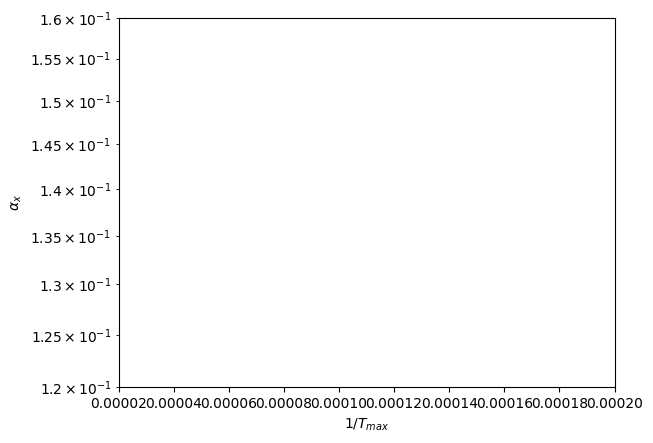

In [36]:
X = np.linspace(0.0, 0.035, num=1000)
Y_ax = fit_ax[0]*X**2 + fit_ax[1]*X + fit_ax[2]
pl.plot(X, Y_ax)
pl.scatter([0.0], [ax], marker='x', color='black')
pl.scatter(inv_time, alphax, label=r'$v = 0.0625$')
pl.xlabel(r'$1/T_{max}$')
pl.xlim(0.00002, 0.0002)
# pl.xscale('symlog', linthresh=0.001)
pl.ylabel(r'$\alpha _x$')
pl.ylim(0.12, 0.16)
pl.yscale('log')

Text(0.5, 1.0, '$v = 0.0625$')

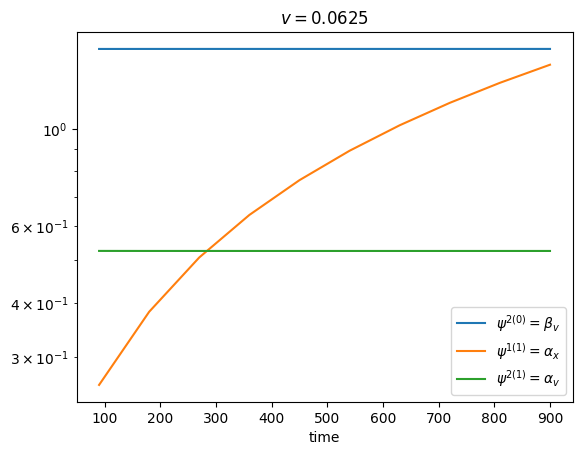

In [37]:
pl.plot(time[TT], np.abs([ PP[i][0, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(0)} = \beta _v $')
pl.plot(time[TT], np.abs([ PP[i][1, 0] for i in range(len(TT)) ]), label=r'$\psi ^{1(1)} = \alpha _x $')
pl.plot(time[TT], np.abs([ PP[i][2, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(1)} = \alpha _v $')

pl.legend()
pl.yscale('log')
pl.xlabel('time')
pl.title(r'$v = 0.0625$')
# pl.savefig('kdv-v2_0.png')

In [38]:
# pl.plot(time[TT], [ PP[i][0, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(0)} = \beta _v $')
# pl.plot(time[TT], [ PP[i][1, 0] for i in range(len(TT)) ], label=r'$\psi ^{1(1)} = \alpha _x $')
# pl.plot(time[TT], [ PP[i][2, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(1)} = \alpha _v $')

# pl.legend()
# pl.yscale('log')
# pl.xlabel('time')
# pl.title(r'$v = 0.0625$')#, $ T_{max} = 2400$')
# # pl.savefig('v0-5.png')

\begin{equation}
    \large \varphi ^{(1)} _{\perp} = \varphi ^{(1)} - \psi ^{j (\mu )} e^{(\mu )}_j
\end{equation}

In [39]:
P = PP[-1]
print(P)
I = phi1[T] - (P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + P[2][0]*e1_2(T))

[[-1.52377546]
 [ 1.40202837]
 [ 0.52545797]]


/tmp/ipykernel_78972/240725466.py:2: RuntimeWarning: overflow encountered in cosh
  return 1/np.cosh(x)


/tmp/ipykernel_78972/240725466.py:2: RuntimeWarning: overflow encountered in cosh
  return 1/np.cosh(x)


(2000.0, 2400.0)

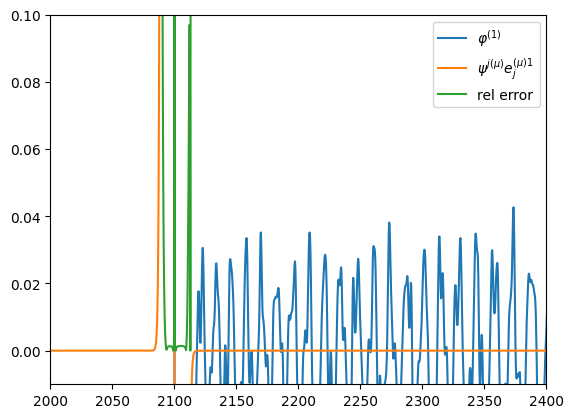

In [42]:
pl.plot(space, phi1[T], label=r'$\varphi ^{(1)} $')
pl.plot(space, P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + P[2][0]*e1_2(T), label=r'$\psi ^{j (\mu )} e^{(\mu ) 1}_j$')
pl.plot(space, np.abs(I/phi1[T]), label=r'rel error')
pl.ylim(-0.01, 0.1)

# pl.plot(space, I, label=r'$\varphi ^{(1) 1} _{\perp}$')
pl.legend()
pl.xlim(2000, 2400)
# pl.title(r'$v = 2.0$')
# pl.savefig('kdv-v2_0-error.png')